In [1]:
import torch
import cmw_utils

import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
x_param = torch.tensor([2.0, 2.0], requires_grad=True)
y_param = torch.tensor([2.0, 2.0], requires_grad=True)

# x_loss = torch.dot(x_param, x_param) * torch.dot(y_param, y_param)
# y_loss =  - torch.dot(x_param, x_param) * torch.dot(y_param, y_param)

x_loss = torch.sum(torch.pow(x_param, 2)) * torch.sum(torch.pow(y_param, 2))
y_loss = - torch.sum(torch.pow(x_param, 2)) * torch.sum(torch.pow(y_param, 2))

b1 = torch.tensor([1.0, 1.0])
b2 = torch.tensor([1.0, 1.0])


result1 = cmw_utils.avp([x_loss, y_loss], [x_param, y_param], [b1, b2], transpose=False, retain_graph=True)
result2 = cmw_utils.avp([x_loss, y_loss], [x_param, y_param], [b1, b2], transpose=True, retain_graph=True)

print(result1)
print(result2)


[tensor([32.5000, 32.5000]), tensor([-31.5000, -31.5000])]
[tensor([-31.5000, -31.5000]), tensor([32.5000, 32.5000])]


In [3]:
x_param = torch.tensor([0.1], requires_grad=True)
y_param = torch.tensor([0.1], requires_grad=True)

alpha = 1.

x_loss = alpha * (torch.sum(x_param) - 0.1) * (torch.sum(y_param) - 0.1)
y_loss = - alpha * (torch.sum(x_param) - 0.1) * (torch.sum(y_param) - 0.1)

nash_list, n_iter = cmw_utils.metamatrix_conjugate_gradient(
    [x_loss, y_loss], [x_param, y_param])

new_params = cmw_utils.project_update(nash_list, [x_param, y_param])
print(new_params)

[tensor([0.1000], grad_fn=<MulBackward0>), tensor([0.1000], grad_fn=<MulBackward0>)]


[tensor([0.3176], grad_fn=<MulBackward0>), tensor([0.3468], grad_fn=<MulBackward0>)]
[0.4000000059604645, 0.30875125527381897, 0.31566736102104187, 0.3187549412250519, 0.3174625039100647, 0.3176235258579254, 0.3176586627960205, 0.3176393210887909, 0.3176424205303192, 0.31764277815818787, 0.3176425099372864, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876, 0.31764253973960876

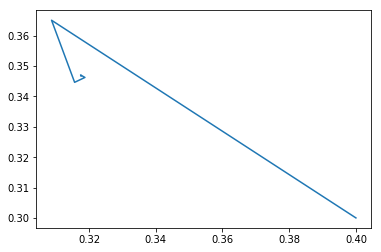

In [5]:


x_param = torch.tensor([0.4], requires_grad=True)
y_param = torch.tensor([0.3], requires_grad=True)

alpha = 1
num_iter = 500

param_list = [x_param, y_param]

x_player = []
y_player = []

for n in range(num_iter):
    x_player.append(float(param_list[0].data[0]))
    y_player.append(float(param_list[1].data[0]))
    
    x_loss = alpha * (torch.sum(param_list[0]) - 0.1) * (torch.sum(param_list[1]) - 0.1)
    y_loss = - alpha * (torch.sum(param_list[0]) - 0.1) * (torch.sum(param_list[1]) - 0.1)
    
    nash_list, n_iter = cmw_utils.metamatrix_conjugate_gradient(
        [x_loss, y_loss], param_list)

    param_list = cmw_utils.project_update(nash_list, [x_param, y_param])
    
print(param_list)
print(x_player, y_player)
plt.plot(x_player, y_player)